# Building the recommendation algo with Multi-Arm bandits (MAB)

In [37]:
rating_cols = ['UserID','MovieID','Rating','Timestamp']
ratings = pd.read_csv("../data/ml-10M100K/ratings.dat", sep="::",names = rating_cols)

/tmp/ipykernel_5101/1043898624.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv("../data/ml-10M100K/ratings.dat", sep="::",names = rating_cols)


In [38]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


# ε-Greedy Algorithm

With probability 𝜖, explore (pick a random arm)

With probability 1−𝜖, exploit (pick the arm with the highest average reward so far)

Tracking for each arm 𝑎:
𝑁𝑎: number of times arm 𝑎 has been pulled
𝑄𝑎: estimated mean reward of arm 𝑎

Update rule:

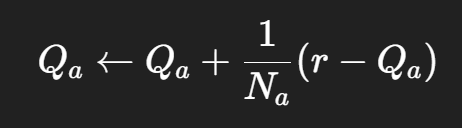

This is an online average (no need to store past rewards).

In [25]:
from typing import List
import numpy as np



# bandit agent (ɛ-greedy strategy)
class EpsilonGreedyBandit:
    def __init__(self,arms:List[int], epsilon=0.1):
        self.arms = arms # list of arms (movie IDs)
        self.epsilon = epsilon
        self.counts = {arm: 0 for arm in arms}
        self.values  = {arm: 0 for arm in arms}
        
    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.arms)
        else:
            return max(self.values , key=self.values.get)
        
    def update(self, arm, reward):
        self.counts[arm] += 1
        n = self.counts[arm]
        value = self.values[arm]
        # Online  update of the value estimate
        new_value = value + (reward - value) / n
        self.values[arm] = new_value

In [26]:
# Reward Simulation from Movies

def get_reward(rating,threshold=4.0):
    return 1 if rating >= threshold else 0

In [43]:
#simulation
def simulate(bandit,ratings_df,steps = 10000):
    rewards = []
    for i in range(steps):
        arm = bandit.select_arm()
        
        #get random rating for the movie
        movie_rating = ratings_df[ratings_df["MovieID"]==arm]
        if len(movie_rating) == 0:
            continue #skip arm with no ratings

        sampled_rating = movie_rating.sample(1)["Rating"].values[0]
        reward = get_reward(sampled_rating)

        bandit.update(arm,reward)
        rewards.append(reward)

        if i % 1000 == 0:
            avg_reward = np.mean(rewards[-1000:]) if len(rewards) >= 1000 else np.mean(rewards)
            print(f"Step {i}, Avg Reward (last 1K): {avg_reward:.3f}")
    
    return rewards

In [44]:
#all the movies id in aleast
moives_ids = ratings["MovieID"].unique().tolist()
# moives_ids

Step 0, Avg Reward (last 1K): 0.000
Step 1000, Avg Reward (last 1K): 0.797
Step 2000, Avg Reward (last 1K): 0.907
Step 3000, Avg Reward (last 1K): 0.917
Step 4000, Avg Reward (last 1K): 0.892
Step 5000, Avg Reward (last 1K): 0.896
Step 6000, Avg Reward (last 1K): 0.910
Step 7000, Avg Reward (last 1K): 0.898
Step 8000, Avg Reward (last 1K): 0.903
Step 9000, Avg Reward (last 1K): 0.922


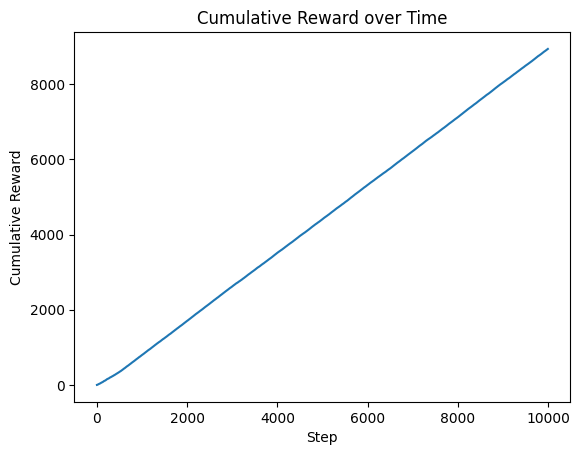

In [45]:
import matplotlib.pyplot as plt

bandit = EpsilonGreedyBandit(arms=moives_ids, epsilon=0.1)

rewards = simulate(bandit, ratings, steps=10000)

plt.plot(np.cumsum(rewards))
plt.title("Cumulative Reward over Time")
plt.xlabel("Step")
plt.ylabel("Cumulative Reward")
plt.show()


In [46]:
rewards

[0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
